
📌 Exploring Dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18



📌 Exploring DataTypes of Features:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None 


📌 Exploring Unique & Frequent Values in Features:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000



📌 Null count:


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Total nulls: 0

📌 Visualizing the relationship of income & spending score:


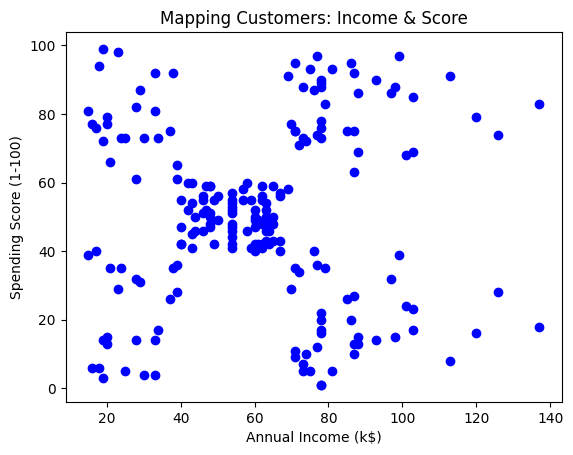


Conclusion:
 k could be 5: data is scattered in 5 visual groups.


📌 Elbow Curve:



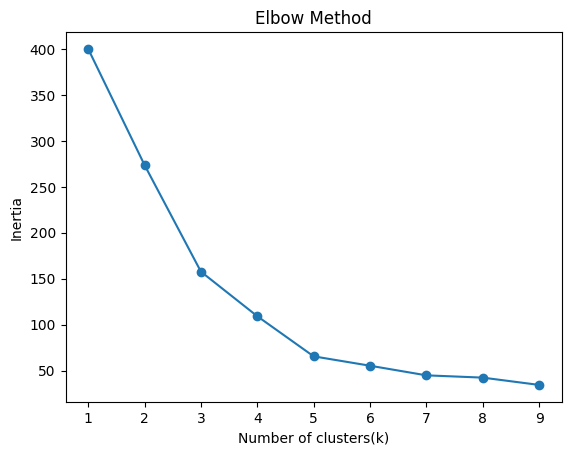


📌 Silhouette Scores:

Silhouette Score for k=2: 0.397
Silhouette Score for k=3: 0.467
Silhouette Score for k=4: 0.494
Silhouette Score for k=5: 0.554
Silhouette Score for k=6: 0.538
Silhouette Score for k=7: 0.526

 Conclusion:
 k = 5: The peak of silhouette & drop of slope in elbow curve.

📌 KMeans Results:



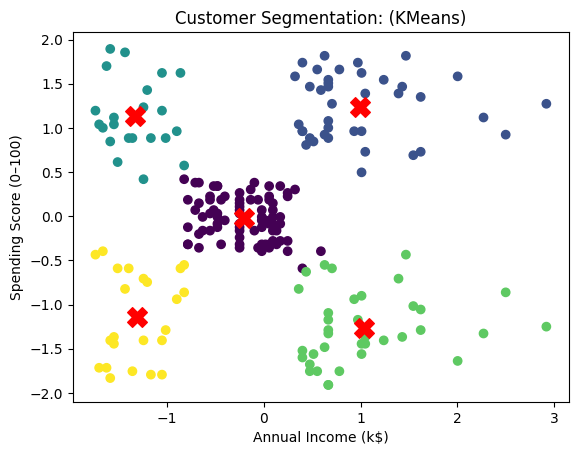


📌 Average Spending Score per Cluster (KMeans):



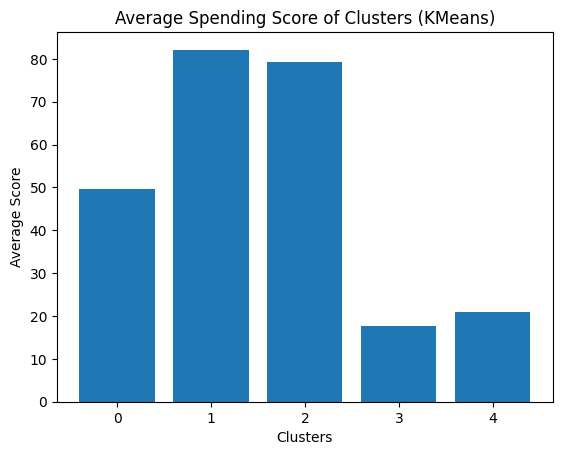


📌 k-distance graph:



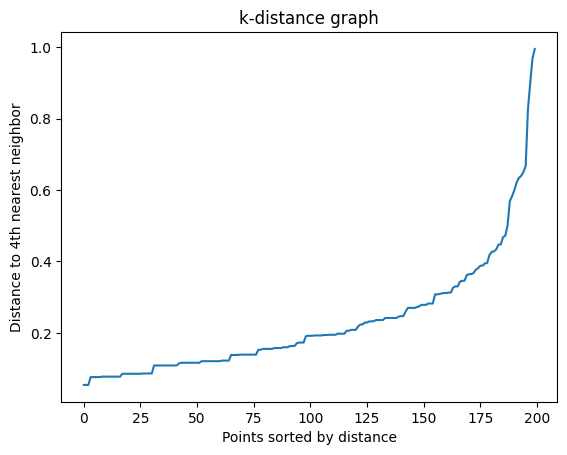


 Conclusion:
 eps = ~0.35

📌 DBSCAN Results:



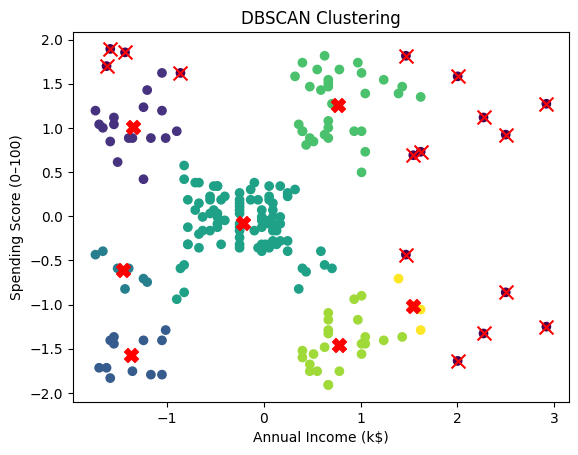


📌 Average Spending Score per Cluster (DBSCAN):



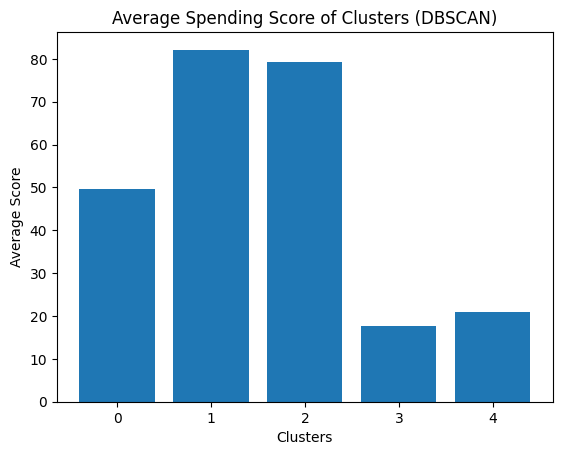


🏆 Conclusion:
While KMeans takes the number of clusters and assigns all points to the nearest cluster
, DBSCAN figures out the number of clusters and starts calculating densities of areas around the point.


In [1]:
#📦 Step 1: Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

#📂 Step 2: Reading the dataset
customers = pd.read_csv("./Mall_Customers.csv")

#🧹 Step 3: Explore & Clean the dataset
print("\n📌 Exploring Dataset:")
display(customers)

print("\n📌 Exploring DataTypes of Features:\n")
print(customers.info(),'\n')

print("\n📌 Exploring Unique & Frequent Values in Features:")
display(customers.describe(include='all'))

print("\n📌 Null count:")
display(customers.isnull().sum())
print("Total nulls:", customers.isnull().sum().sum())

#🎯 Step 4: Assign Features
X = customers[['Annual Income (k$)', 'Spending Score (1-100)']].values

#📊 Step 5: Visualize relationships
 # Visualizing the relationship of income & spending score
print("\n📌 Visualizing the relationship of income & spending score:")
plt.scatter(X[:,0], X[:,1], color="blue", label="Customers")
plt.title("Mapping Customers: Income & Score")
plt.xlabel('Annual Income (k$)')
plt.ylabel("Spending Score (1-100)")
plt.show()

print("\nConclusion:\n k could be 5: data is scattered in 5 visual groups.\n")

#✂️ Step 6: Scaling Features
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

#❓ Step 7: Identifying k value using elbow curve
inertia = []
k_values = range(1,10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

print("\n📌 Elbow Curve:\n")
 # plotting the elbow curve using inertia values
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

#❓ Step 8: Confirming k value using silhouette_score
print("\n📌 Silhouette Scores:\n")
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=1)
    labels = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")

print("\n Conclusion:\n k = 5: The peak of silhouette & drop of slope in elbow curve.")

#🤖 Step 9: Training KMeans Model
kmeans = KMeans(n_clusters=5,random_state=1)

#🔍 Step 10: Predict & Visualize KMeans Outputs
customers["Cluster"] = kmeans.fit_predict(scaled)

print("\n📌 KMeans Results:\n")
 # visualize cluster segments
plt.scatter(scaled[:,0], scaled[:,1], c=customers["Cluster"], cmap="viridis", label="Customers")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c="red", marker="X")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (0–100)")
plt.title("Customer Segmentation: (KMeans)")
plt.show()

#🖥️ Step 11: Calculate & Visualize Average Spending Score per Cluster
 # calculate average spending score per cluster
clusters_scores = np.empty(5)
for i in range(0,clusters_scores.size):
    clusters_scores[i] = customers[customers['Cluster'] == i]['Spending Score (1-100)'].mean()

print("\n📌 Average Spending Score per Cluster (KMeans):\n")
 # plot average spending score per cluster
plt.bar(range(0,5),clusters_scores)
plt.title("Average Spending Score of Clusters (KMeans)")
plt.xlabel("Clusters")
plt.ylabel("Average Score")
plt.show()

#❓ Step 12: Identifying eps value using k-distance graph
 # fit nearest neighbors for k = min_samples
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(scaled)
distances, indices = neighbors_fit.kneighbors(scaled)

 # sort distances
distances = np.sort(distances[:, -1])

print("\n📌 k-distance graph:\n")
 # plot k-distance graph
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 4th nearest neighbor")
plt.show()

print("\n Conclusion:\n eps = ~0.35")

#🤖 Step 12: Training DBSCAN Model
dbscan = DBSCAN(eps=0.35, min_samples=4)

#🔍 Step 13: Predict & Visualize KMeans Outputs
labels = dbscan.fit_predict(scaled)

print("\n📌 DBSCAN Results:\n")
# visualize cluster segments
plt.scatter(scaled[:,0], scaled[:,1], c=labels, cmap="viridis")
# identifying outliers in plot
plt.scatter(scaled[labels == -1,0], scaled[labels == -1,1], c="red", marker="x", s=100, label="Noise/Outliers")
# plotting cluster centers
clusters = np.unique(labels)
for i in clusters[clusters != -1]:
    plt.scatter(scaled[labels == i,0].mean(), scaled[labels == i,1].mean(), c="red", marker="X", s=100, label="Cluster Center")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (0–100)")
plt.title("DBSCAN Clustering")
plt.show()

#🖥️ Step 14: Calculate & Visualize Average Spending Score per Cluster
 # calculate average spending score per cluster
clusters_scores = np.empty(5)
for i in range(0,clusters_scores.size):
    clusters_scores[i] = customers[customers['Cluster'] == i]['Spending Score (1-100)'].mean()

print("\n📌 Average Spending Score per Cluster (DBSCAN):\n")
 # plot average spending score per cluster
plt.bar(range(0,5),clusters_scores)
plt.title("Average Spending Score of Clusters (DBSCAN)")
plt.xlabel("Clusters")
plt.ylabel("Average Score")
plt.show()

 # ✅ Final conclusion
print("\n🏆 Conclusion:")
print("While KMeans takes the number of clusters and assigns all points to the nearest cluster" \
"\n, DBSCAN figures out the number of clusters and starts calculating densities of areas around the point.")


## 🛃 Customer Segmentation — Final Takeaways

🤖 **Models Trained**  
- **KMeans** → Produced clear, balanced clusters (better interpretability).
- **DBSCAN** → Captured outliers, but struggled with defining well-separated clusters in this dataset.

🏆 **Conclusion:**
- While KMeans takes the number of clusters and assigns all points to the nearest cluster, DBSCAN calculates densities of areas around the point.
- ✅KMeans performed best for customer segmentation, providing reliable and business-friendly groupings.
